# **CNN Architecture**

In [1]:
## 1-Implement max pooling on a 4x4 feature map with a 2x2 window

import numpy as np
import tensorflow as tf


In [2]:
# feature map
feature_map=np.array([[1,2,3,4],
                      [5,6,7,8],
                     [9,10,11,12],
                     [13,14,15,16]])

In [3]:
feature_map=feature_map.reshape(1,4,4,1)

In [4]:
## convert feature map to tensorflow tensor

feature_map_tensor=tf.convert_to_tensor(feature_map,dtype=tf.float32)

In [5]:
## max pool layer
max_pooling_laye=tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2)

In [6]:
# Apply max pooling
pooled_feature_map=max_pooling_laye(feature_map_tensor)

In [7]:
print(pooled_feature_map.numpy().reshape((2, 2)))

[[ 6.  8.]
 [14. 16.]]


In [8]:
# 2-Implement a basic convolution operation using a filter and a 5x5 image (matrix)


# Define the 5x5 image (matrix)
image = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20],
    [21, 22, 23, 24, 25]
])
image=image.reshape(1,5,5,1)

# Define the 3x3 filter (kernel)
filter = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])
filter=filter.reshape(3,3,1,1)

image_tensor=tf.convert_to_tensor(image,dtype=tf.float32)
filter_tensor=tf.convert_to_tensor(filter,dtype=tf.float32)

conv_output=tf.nn.conv2d(image_tensor,filter_tensor,strides=[1,1,1,1],padding='SAME')
print(conv_output.numpy().reshape((5, 5)))

[[-3. -1.  1.  3. 11.]
 [11.  7.  8.  9. 21.]
 [21. 12. 13. 14. 31.]
 [31. 17. 18. 19. 41.]
 [67. 49. 51. 53. 81.]]


In [45]:
## 3 Implement the ReLU activation function on a feature map
def relu(feature_map):
    return np.maximum(0,feature_map)


feature_map=np.array([[1,-2,3,4],
                      [5,6,7,-8],
                     [-9,10,0,12],
                     [13,14,15,16]])
print("Original feature map")
print(feature_map)
print("Feature map after ReLU activation")
print(relu(feature_map))

Original feature map
[[ 1 -2  3  4]
 [ 5  6  7 -8]
 [-9 10  0 12]
 [13 14 15 16]]
Feature map after ReLU activation
[[ 1  0  3  4]
 [ 5  6  7  0]
 [ 0 10  0 12]
 [13 14 15 16]]


In [48]:
## Create a simple CNN model with one convolutional layer and a fully connected layer, using random data

import tensorflow
from tensorflow.keras.layers import Dense,Conv2D,Flatten
from tensorflow.keras import models,Sequential
import numpy as np


In [51]:
np.random.seed(0)
#Generate random data
x_train=np.random.rand(100,28,28,1)
y_train=np.random.randint(0,2,100)

In [55]:

#Cnn model
model=Sequential([
                  Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
                  Flatten(),
                  Dense(128,activation='relu'),
                  Dense(1,activation='sigmoid')
                  ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
history=model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [57]:
model.fit(x_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.5964 - loss: 1.3174
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4043 - loss: 1.2114
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5645 - loss: 0.7338
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6346 - loss: 0.6250
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8492 - loss: 0.5747
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5683 - loss: 0.5923
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9382 - loss: 0.5143
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9656 - loss: 0.4512
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8980 - loss: 0.4028
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9755 - loss: 0.3787


In [67]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       2,769,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,308,421 (31.69 MB)

 Trainable params: 2,769,473 (10.56 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,538,948 (21.13 MB)

In [68]:
##  4 - Generate a synthetic dataset using random noise and train a simple CNN model on it

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

np.random.seed(0)

n_samples=1000
image_size=28
num_classes=2
X=np.random.rand(n_samples,image_size,image_size,1)
y=np.random.randint(0,num_classes,n_samples)

X=X.reshape(-1,image_size,image_size,1)

# split the data
train_size=int(0.8*n_samples)
X_train,X_test=X[:train_size],X[train_size:]
y_train,y_test=y[:train_size],y[train_size:]

## Define the cnn model
model=Sequential([
                  Conv2D(32,(3,3),activation='relu',input_shape=(image_size,image_size,1)),
                  MaxPooling2D((2,2)),
                  Flatten(),
                  Dense(64,activation='relu'),
                  Dense(num_classes,activation='softmax')
                  ])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.4788 - loss: 0.7490 - val_accuracy: 0.5200 - val_loss: 0.6931
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5191 - loss: 0.6926 - val_accuracy: 0.4750 - val_loss: 0.6976
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4922 - loss: 0.6951 - val_accuracy: 0.4750 - val_loss: 0.6971
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5032 - loss: 0.6942 - val_accuracy: 0.5250 - val_loss: 0.6917
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5387 - loss: 0.6845 - val_accuracy: 0.5250 - val_loss: 0.6920
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5975 - loss: 0.6748 - val_accuracy: 0.5250 - val_loss: 0.6944
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5740 - loss: 0.6689 - val_accuracy: 0.5150 - val_loss: 0.6921
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7550 - loss: 0.6520 - val_accuracy: 0.5200 - val_loss: 0.

In [69]:
## evulate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.2f}')


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5010 - loss: 0.7392
Test accuracy: 0.52


In [76]:
## Create a simple CNN using Keras with one convolution layer and a max-pooling layer

from keras.datasets import mnist
(Xtrin,ytrain),(xtest,ytest)=mnist.load_data()

Xtrin=Xtrin.reshape(-1,28,28,1)
xtest=xtest.reshape(-1,28,28,1)

Xtrin=Xtrin.astype('float32')/255
xtest=xtest.astype('float32')/255

model=Sequential([
                  Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
                  MaxPooling2D((2,2)),
                  Flatten(),
                  Dense(64,activation='relu'),
                  Dense(10,activation='softmax')
                  ])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(Xtrin,ytrain,epochs=10,batch_size=32,validation_data=(xtest,ytest))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9005 - loss: 0.3492 - val_accuracy: 0.9753 - val_loss: 0.0742
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9817 - loss: 0.0623 - val_accuracy: 0.9800 - val_loss: 0.0583
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.9863 - loss: 0.0434 - val_accuracy: 0.9810 - val_loss: 0.0589
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 20ms/step - accuracy: 0.9915 - loss: 0.0291 - val_accuracy: 0.9842 - val_loss: 0.0474
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.9934 - loss: 0.0214 - val_accuracy: 0.9852 - val_loss: 0.0501
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 18ms/step - accuracy: 0.9959 - loss: 0.0133 - val_accuracy: 0.9853 - val_loss: 0.0502
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9968 - loss: 0.0097 - val_accuracy: 0.9828 - val_loss: 0.0621
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9969 -

In [77]:
#  Write a code to add a fully connected layer after the convolution and max-pooling layers in a CNN

model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))

## putting max pooling layer
model.add(MaxPooling2D(2,2))

model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))

# Output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

None


In [78]:
# 8 Write a code to add  batch normalization to a simple CNN model

from tensorflow.keras.layers import BatchNormalization

# Create a simple CNN model
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))

## putting batchnormalization
model.add(BatchNormalization())

model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))

# Output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │       2,769,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,770,762 (10.57 MB)

 Trainable params: 2,770,698 (10.57 MB)

 Non-trainable params: 64 (256.00 B)

None


In [79]:
# 9 Write a code to add dropout regularization to a simple CNN mode|

from tensorflow.keras.layers import BatchNormalization,Dropout

# Create a simple CNN model
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))

## putting Dropout layer
model.add(Dropout(0.001))

model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))

# Output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │       2,769,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,770,634 (10.57 MB)

 Trainable params: 2,770,634 (10.57 MB)

 Non-trainable params: 0 (0.00 B)

None


553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

None


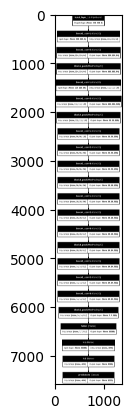

In [80]:
# 10 Write a code to print the architecture of the VGG16 model in Keras

# Import necessary libraries
from keras.applications import VGG16
from keras.utils import plot_model
import matplotlib.pyplot as plt

# Create an instance of the VGG16 model
model = VGG16(include_top=True, weights='imagenet', input_shape=(224, 224, 3))

# Print the model summary
print(model.summary())

# Plot the model architecture
plot_model(model, to_file='vgg16_architecture.png', show_shapes=True, show_layer_names=True)

# Display the plot
plt.imshow(plt.imread('vgg16_architecture.png'))
plt.show()

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9085 - loss: 0.3152 - val_accuracy: 0.9788 - val_loss: 0.0677
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9799 - loss: 0.0637 - val_accuracy: 0.9818 - val_loss: 0.0558
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.9886 - loss: 0.0368 - val_accuracy: 0.9847 - val_loss: 0.0450
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9910 - loss: 0.0287 - val_accuracy: 0.9847 - val_loss: 0.0488
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 19ms/step - accuracy: 0.9952 - loss: 0.0162 - val_accuracy: 0.9870 - val_loss: 0.0414


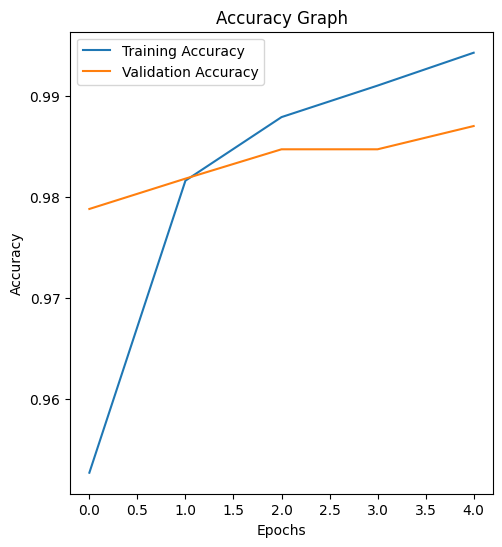

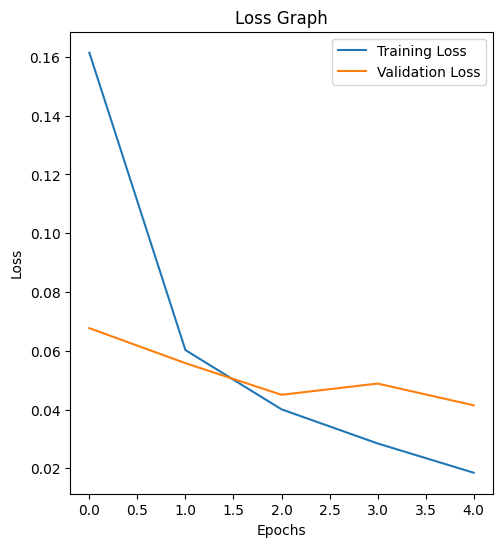

In [82]:
# 11 Write a code to plot the accuracy and loss graphs after training a CNN model

# Import necessary libraries
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.datasets import mnist
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape input data to fit Conv2D layer requirements
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Normalize pixel values to [0, 1] range
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Plot the accuracy graph
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the loss graph
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [86]:
# 12 Write a code to print the architecture of the ResNet50 model in Keras

from keras.applications import ResNet50
from keras.utils import plot_model
import matplotlib.pyplot as plt

model=ResNet50(include_top=True,weights='imagenet',input_shape=(224,224,3))

print(model.summary())


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_17            │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_17[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

None


In [12]:
# 5 Write a code to train a basic CNN model and print the training loss and accuracy after each epoch?

import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras import models,Sequential
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test)=cifar10.load_data()



In [13]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [19]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3))),
model.add(MaxPooling2D((2,2))),
model.add(Conv2D(64,(3,3),activation='relu')),
model.add(MaxPooling2D((2,2))),
model.add(Conv2D(128,(3,3),activation='relu')),
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))


# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])




/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
class print_epoch(Callback):
  def on_epoch_end(self,epoch,logs=None):
    print(f"Epoch {epoch+1} loss: {logs['loss']:.4f} - accuracy: {logs['accuracy']:.4f}")


In [22]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), callbacks=[print_epoch()])

Epoch 1/5
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5570 - loss: 1.2392Epoch 1 loss: 1.1750 - accuracy: 0.5824
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.5570 - loss: 1.2392 - val_accuracy: 0.6169 - val_loss: 1.0834
Epoch 2/5
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6574 - loss: 0.9825Epoch 2 loss: 0.9522 - accuracy: 0.6660
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.6574 - loss: 0.9824 - val_accuracy: 0.6746 - val_loss: 0.9371
Epoch 3/5
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7037 - loss: 0.8437Epoch 3 loss: 0.8254 - accuracy: 0.7113
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.7037 - loss: 0.8437 - val_accuracy: 0.6698 - val_loss: 0.9399
Epoch 4/5
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7438 - loss: 0.7297Epoch 4 loss: 0.7368 - accuracy: 0.7411
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.7438 - loss: 0.7297 - val_accuracy: 0.6958 - val_loss: 0.8915
Epoch 5/

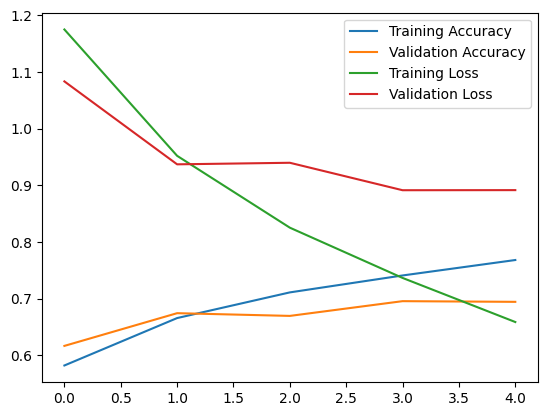

In [23]:
# Plot the training and validation accuracy and loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()